# The breakdown of the Phillips Curve

**Motivation for the project and relevans to economics**

This project is our data project where we create a Philips curve from historical data on inflation and employment in the US. In the 1960s the U.S. data showed a good correlation between unemplyment and inflation. However in the 1970s and onwards that relationship disappeared. We found it interesting to recreate the Philips curve from the 1960s with U.S. data but then also look at other periods in time to see if the correlation between inflation and unemployment has actually disappeared - this is not meant as a causal analysis, but just to explore an interesting concept that was widely belived to be true in the economics profession.

# Project setup

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Getting data from API calls

## Getting FRED data

### Inflation

In [8]:
# A wrapper for multiple APIs with a pandas interface
# Run this in your terminal to use the pandas-datareader: %pip install pandas-datareader

# Importing the pandas_datareader module
import pandas_datareader

# Importing the datetime module
import datetime

# Specifying the timespan you want data from
start = datetime.datetime(1950,1,1)
end = datetime.datetime(2024,1,1)
timespan = end - start # Getting the timespan by subtracting start from end

# Getting inflation data
inflation_us = pandas_datareader.data.DataReader('FPCPITOTLZGUSA', 'fred', start, end)

print(f"U.S. inflation from 1950 until 2024")
inflation_us.sample(10)

U.S. inflation from 1950 until 2024


,FPCPITOTLZGUSA
DATE,
1968-01-01,4.271796
1967-01-01,2.772786
2000-01-01,3.376857
2020-01-01,1.233584
1973-01-01,6.177760
2013-01-01,1.464833
1966-01-01,3.015075
1996-01-01,2.931204
1986-01-01,1.898048


#### Descriptive statistics over the inflation data

<module 'matplotlib.pyplot' from 'c:\\Users\\Nikoline Laursen\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

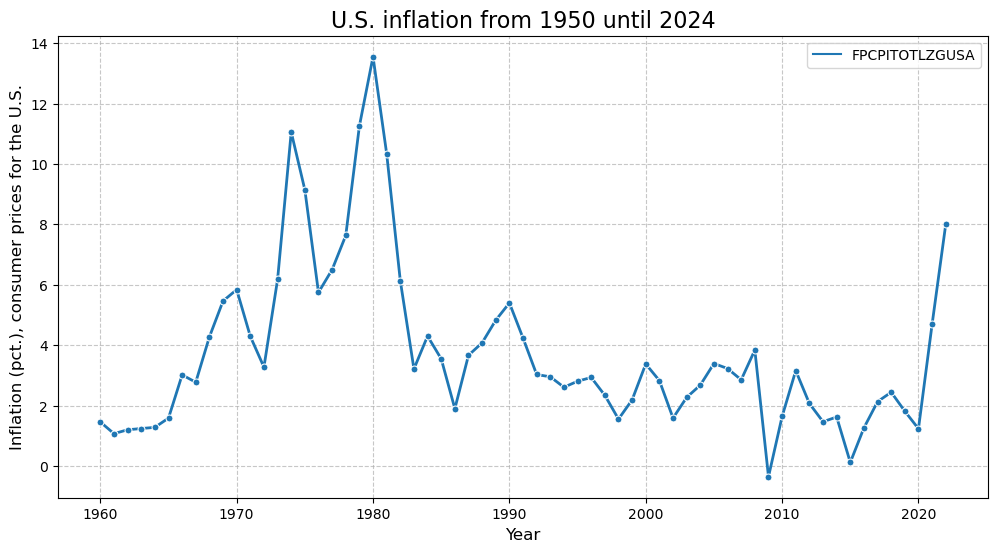

In [4]:
# Suppress FutureWarning about use_inf_as_na
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing the graph helper class to reuse the graph generating code
import GraphHelper

# Plot the U.S. inflation data
GraphHelper.pretty_line_plot(
    inflation_us, 
    "U.S. inflation from 1950 until 2024", 
    "Year", 
    "Inflation (pct.), consumer prices for the U.S.")

### Unemployment

In [5]:
# Getting unemployment data
unemployment_us = pandas_datareader.data.DataReader('UNRATE', 'fred', start, end)
unemployment_us.sample(10)

,UNRATE
DATE,
1966-12-01,3.8
1998-09-01,4.6
1964-04-01,5.3
1991-04-01,6.7
1998-05-01,4.4
1979-06-01,5.7
1956-12-01,4.2
1971-08-01,6.1
1973-09-01,4.8


#### Descriptive statistics over the unemployment data

<module 'matplotlib.pyplot' from 'c:\\Users\\Nikoline Laursen\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

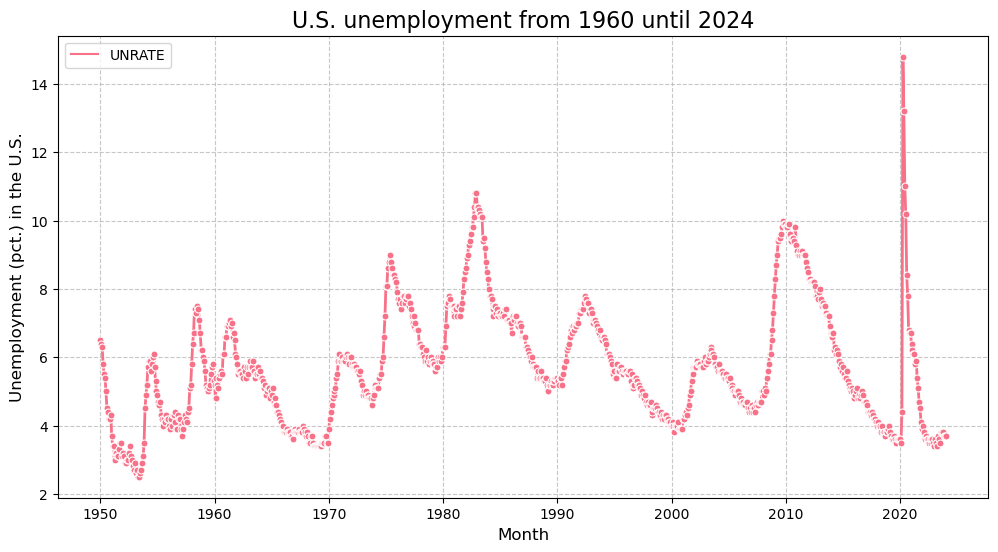

In [6]:
# Plot the U.S. inflation data
GraphHelper.pretty_line_plot(
    unemployment_us, 
    "U.S. unemployment from 1960 until 2024", 
    "Month", 
    "Unemployment (pct.) in the U.S.")

## Getting DST data

### Inflation DK

In [41]:
# Importing the datetime module
import datetime
# Importing the DstApi to fetch data from the API
# Run this in your terminal to use the DstAPi: %pip install git+https://github.com/alemartinello/dstapi
from dstapi import DstApi

# Initializing DstApi object
inflation_dk = DstApi('PRIS8')

# Getting an overview over the data
tabsum =api.tablesummary(language='en')

display(tabsum)

# The available values for a each variable: 
for variable in tabsum['variable name']:
    print(variable+':')
    display(inflation_dk.variable_levels(variable, language='en'))

Table PRIS8: Consumer price index, annual average by type and time
Last update: 2024-01-10T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,TYPE,1,INDEKS,Consumer price index,INDEKS,Consumer price index,False
1,Tid,124,1900,1900,2023,2023,True


TYPE:


,id,text
0,INDEKS,Consumer price index


Tid:


,id,text
0,1900,1900
1,1901,1901
2,1902,1902
3,1903,1903
4,1904,1904
...,...,...
119,2019,2019
120,2020,2020
121,2021,2021
122,2022,2022


#### Descriptive statistics over the inflation data

In [45]:
## ?


C:\Users\Nikoline Laursen\AppData\Local\Temp\ipykernel_6404\2660187833.py:4: UserWarning: API call parameters are not specified. Parameters resulting in the download of the entire table will be automatically generated. This can result in massive data downloads.
  data = inflation_dk.get_data()


Execution aborted


TypeError: 'NoneType' object is not iterable

### Unemployment DK


In [46]:
# Initializing DstApi object
unemployment_dk = DstApi('AULAAR')

# Getting an overview over the data
tabsum =api.tablesummary(language='en')

display(tabsum)

# The available values for a each variable: 
for variable in tabsum['variable name']:
    print(variable+':')
    display(unemployment_dk.variable_levels(variable, language='en'))

Table PRIS8: Consumer price index, annual average by type and time
Last update: 2024-01-10T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,TYPE,1,INDEKS,Consumer price index,INDEKS,Consumer price index,False
1,Tid,124,1900,1900,2023,2023,True


TYPE:

                Error: The table does not seem to contain the requested variable.
                Check the spelling (variable names are case sensitive
                )


IndexError('list index out of range')

Tid:


,id,text
0,1979,1979
1,1980,1980
2,1981,1981
3,1982,1982
4,1983,1983
5,1984,1984
6,1985,1985
7,1986,1986
8,1987,1987
9,1988,1988


# Read and clean data

In [32]:
# Import the DstApi to fetch data from the API
# Remember to: install with `pip install git+https://github.com/alemartinello/dstapi`
from dstapi import DstApi



In [33]:
kontanthjælpsmodtagere = DstApi('KY01')

tabsum = kontanthjælpsmodtagere.tablesummary(language='en')

display(tabsum)

# The available values for a each variable: 
for variable in tabsum['variable name']:
    print(variable+':')
    display(kontanthjælpsmodtagere.variable_levels(variable, language='en'))


Table KY01: Cash benefits (persons) by visitation, age, sex and time
Last update: 2024-03-08T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,VISITATION,6,TOT,Total,9,Not stated,False
1,ALDER,7,TOT,"Age, total",6099,60 year and over,False
2,KØN,3,TOT,Total,K,Women,False
3,Tid,204,2007M01,2007M01,2023M12,2023M12,True


VISITATION:


,id,text
0,TOT,Total
1,1,Ready to work
2,2,Ready to participate in training programmes
3,3,Clearly ready for education and training
4,4,Ready for education and training
5,9,Not stated


ALDER:


,id,text
0,TOT,"Age, total"
1,16-24,16-24 years
2,25-29,25-29 years
3,30-39,30-39 years
4,40-49,40-49 years
5,50-59,50-59 years
6,6099,60 year and over


KØN:


,id,text
0,TOT,Total
1,M,Men
2,K,Women


Tid:


,id,text
0,2007M01,2007M01
1,2007M02,2007M02
2,2007M03,2007M03
3,2007M04,2007M04
4,2007M05,2007M05
...,...,...
199,2023M08,2023M08
200,2023M09,2023M09
201,2023M10,2023M10
202,2023M11,2023M11


Import your data, either through an API or manually, and load it. 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [34]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [35]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

NameError: name 'venn2' is not defined

<Figure size 1500x700 with 0 Axes>

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.